In [96]:
import os
import numpy as np
import matplotlib.pyplot as plt
import py_tps as tps
from PIL import Image

In [97]:
# Путь к папке с исходными изображениями и файлу *.TPS
image_dir = '../data/raw/Ac_Fom_2022_WM'      # <- задать
# Имя файла *.TPS
tps_file_name = 'Ac_Fom2022WM_FL.TPS'         # <- задать

In [98]:
# Путь к папке где будут храниться обработанные изображения и файлу *.TPS для них
new_image_dir = '../data/interin/Ac_Fom_2022_WM_interin'      # <- задать
# Имя файла *.TPS
new_tps_file_name = 'Ac_Fom2022WM_FL_interin.TPS'         # <- задать

In [99]:
# Создание новой папки если её нет
os.makedirs(new_image_dir, exist_ok=True)

In [100]:
# Путь к исходному файлу *.TPS (проверить, что путь правильный)
tps_file_path = os.path.join(image_dir, tps_file_name)
print(tps_file_path)

../data/raw/Ac_Fom_2022_WM\Ac_Fom2022WM_FL.TPS


In [101]:
# Загрузка всех данных из исходного *.TPS файла в переменную `tps_file`
tps_file = tps.TPSFile.read_file(tps_file_path)

In [102]:
# Колличество записей в *.TPS файле бужет храниться в переменной `number_tps_file`
number_tps_file = len(tps_file.images)
print(number_tps_file)

281


In [103]:
# Проверка, что все файлы изображений записанные в *.TPS есть в папке `image_dir`
for i in range(number_tps_file):
    if not(os.path.exists(os.path.join(image_dir, tps_file.images[i].image))):
        print(f"В папке {image_dir} нет файла {tps_file.images[i].image}")
else:
    print(f"В папке {image_dir} найдены все файлы из {tps_file_name}")

В папке ../data/raw/Ac_Fom_2022_WM найдены все файлы из Ac_Fom2022WM_FL.TPS


In [104]:
# Задание границы вокруг ландмарок для обрезки крыла
border_zone = 100       # <- колличество пикселей вокруг ландмарков для обрезки изображения

In [105]:
# Пустой массив для хранения объектов tps
image_tps_array = []

# В цикле все фото перебираются и обрезаются по ландмаркам с заданной границей
# Точки 20 и 21 не выризаются и масштаб не считается
for index in range(number_tps_file):
    # Загрузка фото и его перевод в массив numpy, определение размера в пиксилях
    image = Image.open(os.path.join(image_dir, tps_file.images[index].image))
    image_array = np.array(image)
    image_shape = image_array.shape

    # Загрузка ландмарок и их зеркальное отображение по вертикали
    landmarks = tps_file.images[index].landmarks.points
    landmarks_flip = np.zeros(landmarks.shape)
    landmarks_flip[:,0] = landmarks[:,0]
    landmarks_flip[:,1] = image_shape[0] - landmarks[:,1]

    # Определение границ обрезки по мин и мак координатам ландмарок
    min_landmarks_0 = min(landmarks_flip[:,0]-border_zone)
    max_landmarks_0 = max(landmarks_flip[:,0]+border_zone)
    min_landmarks_1 = min(landmarks_flip[:,1]-border_zone)
    max_landmarks_1 = max(landmarks_flip[:,1]+border_zone)

    # Обрезка фото, перевод в массив numpy, определение размера в пиксилях
    image_new = image.crop((min_landmarks_0, min_landmarks_1, max_landmarks_0, max_landmarks_1))
    image_array_new = np.array(image_new)
    image_array_new_shape = image_array_new.shape

    # Сохранение обрезанного фото в папку new_image_dir со старым именем + '_crop.JPG' 
    image_new = image_new.save(os.path.join(new_image_dir, tps_file.images[index].image + '_crop.JPG'))

    # Масштабирование ландмарок на новый размер фото
    landmarks_new = np.zeros(landmarks.shape)
    landmarks_new[:,0] = landmarks_flip[:,0]-min_landmarks_0
    landmarks_new[:,1] = landmarks_flip[:,1]-min_landmarks_1

    # Обратное зеркальное отображение по вертикали для записи в новый файл *.TPS 
    landmarks_new_flip = np.zeros(landmarks.shape)
    landmarks_new_flip[:,0] = landmarks_new[:,0]
    landmarks_new_flip[:,1] = image_array_new_shape[0] - landmarks_new[:,1]

    # Подготовка данных для записи в новый файл *.TPS
    points = tps.TPSPoints(landmarks_new_flip)
    image_tps = tps.TPSImage(tps_file.images[index].image + '_crop.JPG', landmarks=points, id_number=index)
    image_tps_array.append(image_tps)

# Записи в новый файл *.TPS    
tps_file_new = tps.TPSFile(image_tps_array)
tps_file_new.write_to_file(os.path.join(new_image_dir, new_tps_file_name))

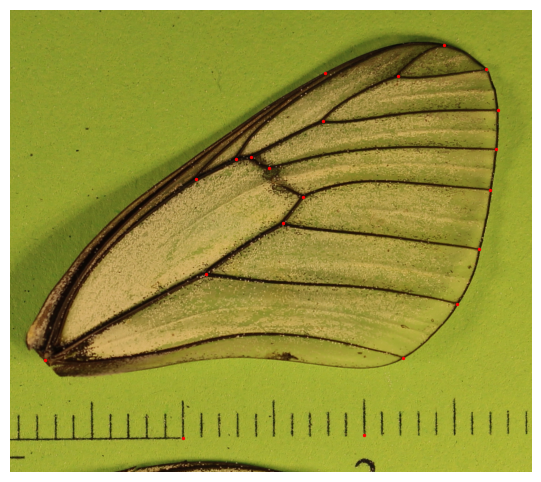

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_array_new)
ax.axis(False)
ax.scatter(landmarks_new[:,0], landmarks_new[:,1], s=2, color ='r') # <- тут можно поменять размер (s) и цвет (color) ландмарок
plt.show()

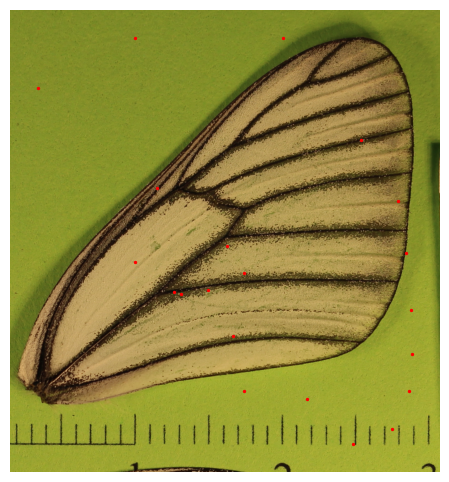

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_array_new)
ax.axis(False)
ax.scatter(landmarks_new_flip[:,0], landmarks_new_flip[:,1], s=2, color ='r') # <- тут можно поменять размер (s) и цвет (color) ландмарок
plt.show()